# Medical Cost Personal

In [75]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression

## Data Extraction

In [76]:
medical = pd.read_csv('insurance.csv')
df = pd.DataFrame(medical)

In [77]:
df.shape

(1338, 7)

In [78]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [79]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Transform Data

In [81]:
df.sex[df.sex == 'female'] = 0
df.sex[df.sex == 'male'] = 1
df.head()

C:\Users\bayu\AppData\Local\Temp/ipykernel_17004/3737206920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex[df.sex == 'female'] = 0
C:\Users\bayu\AppData\Local\Temp/ipykernel_17004/3737206920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex[df.sex == 'male'] = 1


age sex     bmi  children smoker     region      charges
0   19   0  27.900         0    yes  southwest  16884.92400
1   18   1  33.770         1     no  southeast   1725.55230
2   28   1  33.000         3     no  southeast   4449.46200
3   33   1  22.705         0     no  northwest  21984.47061
4   32   1  28.880         0     no  northwest   3866.85520

In [82]:
df['charges'] = df['charges'].astype(int)
df.head()

age sex     bmi  children smoker     region  charges
0   19   0  27.900         0    yes  southwest    16884
1   18   1  33.770         1     no  southeast     1725
2   28   1  33.000         3     no  southeast     4449
3   33   1  22.705         0     no  northwest    21984
4   32   1  28.880         0     no  northwest     3866

## Linear Regression Model

In [83]:
df.head()

age sex     bmi  children smoker     region  charges
0   19   0  27.900         0    yes  southwest    16884
1   18   1  33.770         1     no  southeast     1725
2   28   1  33.000         3     no  southeast     4449
3   33   1  22.705         0     no  northwest    21984
4   32   1  28.880         0     no  northwest     3866

In [84]:
candidates = {'age': [19,18,28,33,32],
              'sex': [0,1,1,1,1],
              'children': [0,1,3,0,0],
              'charges' : [16884, 1725, 4449, 21984, 3866]}
df = pd.DataFrame(candidates, columns= ['age', 'sex', 'children', 'charges'])
print(df)

   age  sex  children  charges
0   19    0         0    16884
1   18    1         1     1725
2   28    1         3     4449
3   33    1         0    21984
4   32    1         0     3866


In [85]:
X = df[['sex']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3, 1)
(3,)
(2, 1)
(2,)


In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print(X_test)
print(y_predict)

   sex
2    1
1    1
[12925. 12925.]


In [87]:
pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(pred)
print(accuracy)

[12925. 12925.]
0.0


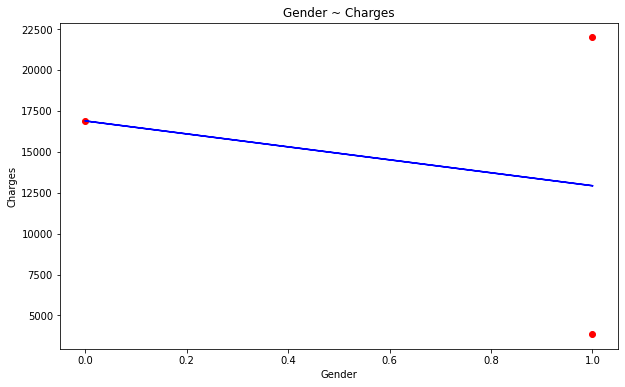

In [88]:
#plotting training
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, lr.predict(X_train), color='blue')
plt.title("Gender ~ Charges")
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()

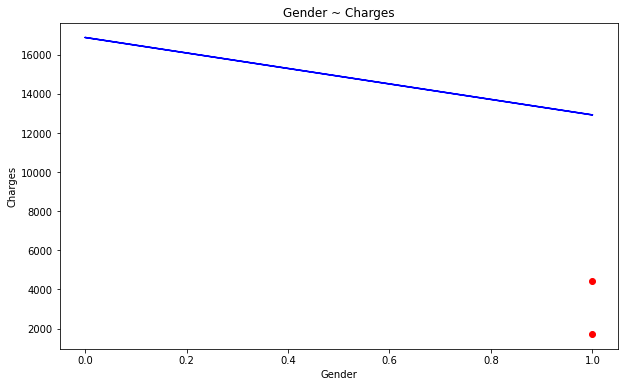

In [89]:
#plotting testing
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, lr.predict(X_train), color='blue')
plt.title("Gender ~ Charges")
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()

## Visualization

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

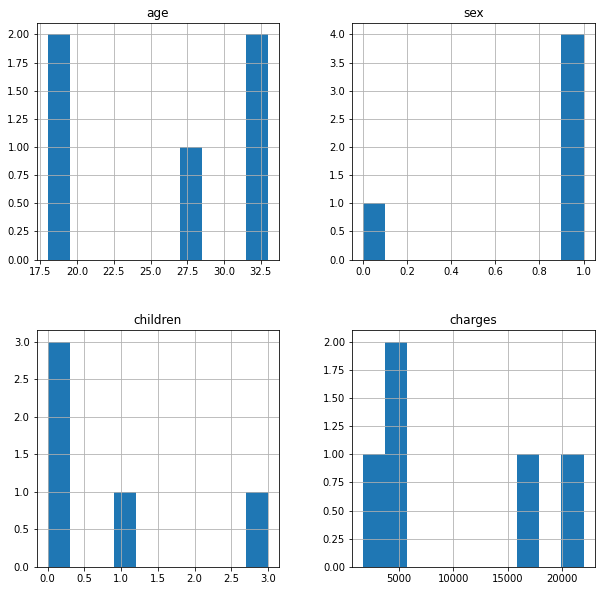

In [90]:
df.hist(figsize=(10,10))

<AxesSubplot:>

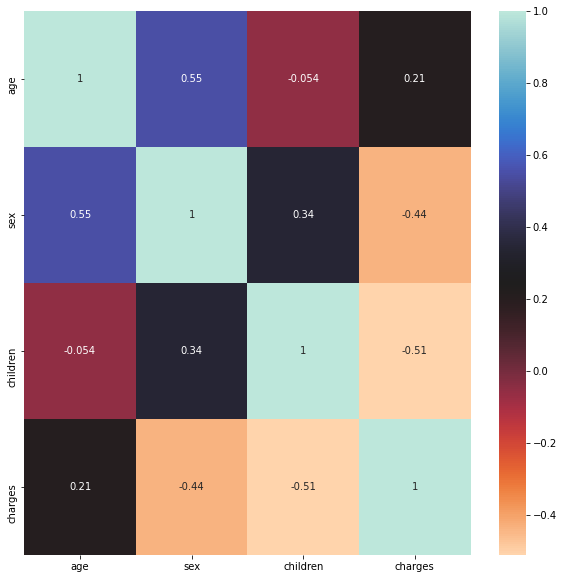

In [91]:
#heatmap correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='icefire_r')

c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


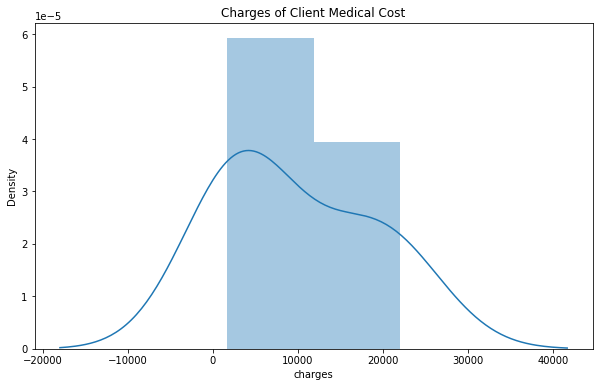

In [92]:
#distribution
plt.figure(figsize=(10,6))
sns.distplot(df.charges)
plt.title("Charges of Client Medical Cost")
plt.show()

c:\users\bayu\opencv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


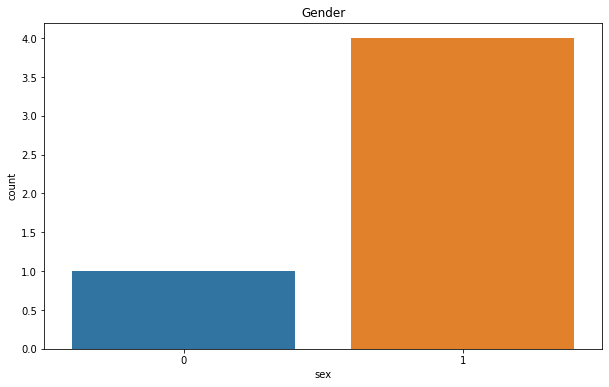

In [93]:
#print('countplot of gender')
plt.figure(figsize=(10,6))
sns.countplot(df.sex)
plt.title("Gender")
plt.show()

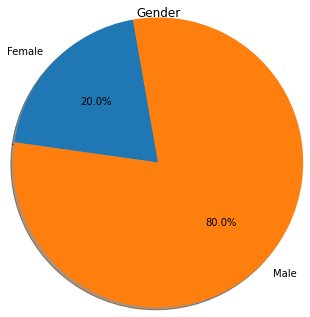

In [94]:
#print('pie chart of gender')
plt.figure(figsize=(5,6))
gender = [np.count_nonzero(df['sex'] == 0),
         np.count_nonzero(df['sex'] == 1)]
activities = ['Female', 'Male']
plt.title("Gender")
plt.pie(gender, labels=activities, radius=1.3, startangle=100, autopct='%.1f%%', shadow=True)
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Density'>

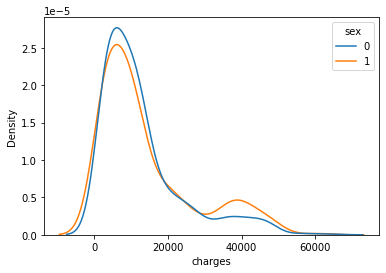

In [95]:
#print('kdeplot of charges and gender')
sns.kdeplot(data=medical, x='charges', hue='sex')

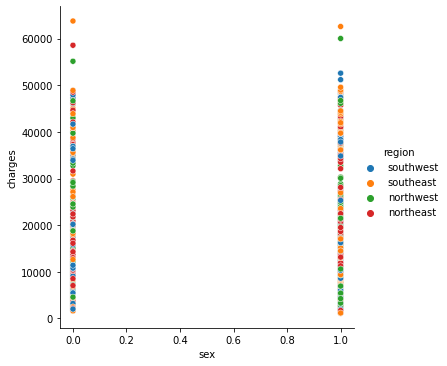

In [96]:
#print('relplot of charges gender')
sns.relplot(data=medical, x='sex', y='charges', hue='region')